# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.

---
## Step 0: Load The Data

We start by writing a helper function that downloads and decompresses the traffic sign image examples. Automating this process would help us when we move the  work to AWS in step 2.  

In [1]:
import os
import sys
import pickle
import numpy as np
import random
import utils
import keras.preprocessing.image as io

Using TensorFlow backend.


In [2]:
data_url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/February/5898cd6f_traffic-signs-data/traffic-signs-data.zip"
dest_dir = "traffic-signs-data"
training_file = os.path.join(dest_dir, "train.p")
validation_file= os.path.join(dest_dir, "valid.p")
testing_file = os.path.join(dest_dir, "test.p")
utils.download_and_unzip(data_url, dest_dir, training_file, validation_file, testing_file)

INFO Data set 
traffic-signs-data/train.p, 
traffic-signs-data/valid.p, 
traffic-signs-data/test.p
INFO from url: https://d17h27t6h515a5.cloudfront.net/topher/2017/February/5898cd6f_traffic-signs-data/traffic-signs-data.zip
INFO successfully downloaded and unzipped


In [3]:
# Load pickled data

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)

X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

assert(len(X_train) == len(y_train))
assert(len(X_valid) == len(y_valid))
assert(len(X_test) == len(y_test))

In [4]:
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train, random_state=0)
X_valid, y_valid = shuffle(X_valid, y_valid, random_state=0)
X_test, y_test = shuffle(X_test, y_test, random_state=0)

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas


In [5]:
utils.get_stats(train['features'], train['labels'], 'Train')
utils.get_stats(valid['features'], valid['labels'], 'Valid')
utils.get_stats(test['features'], test['labels'], 'Test')


Dataset: Train 
Number of examples: 34799
Image data shape: (32, 32, 3)
Min: 0.0000
Max: 255.0000
Mean: 82.6776
Std Dev: 67.8509
Number of classes: 43

Dataset: Valid 
Number of examples: 4410
Image data shape: (32, 32, 3)
Min: 0.0000
Max: 255.0000
Mean: 83.5564
Std Dev: 69.8877
Number of classes: 43

Dataset: Test 
Number of examples: 12630
Image data shape: (32, 32, 3)
Min: 0.0000
Max: 255.0000
Mean: 82.1485
Std Dev: 68.7441
Number of classes: 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import plots

%matplotlib inline
plt.style.use('ggplot')

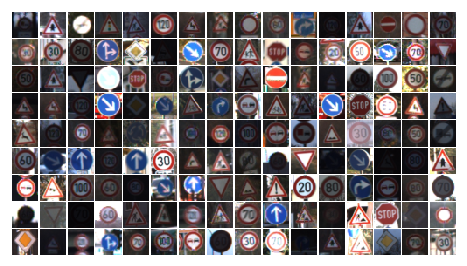

In [7]:
plots.display_square_grid(X_train)

The image above shows sample images from the train dataset. The mean intensity and contrast(difference between brightest pixel and darkest pixel) vary across the samples.

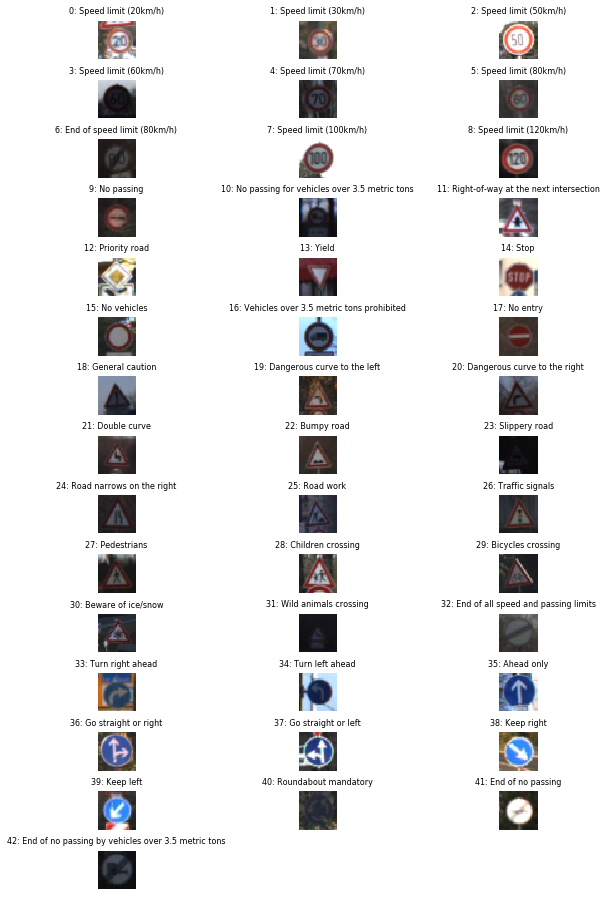

In [8]:
import plots
sign_names = pd.read_csv("traffic-signs-data/signnames.csv")
first_43 = plots.display_w_labels(X_train, y_train, sign_names)

In [6]:
from collections import Counter
import pandas as pd

def get_label_dist(labels):
    ratio = {}
    tmp_count = Counter(labels)
    for k, v in tmp_count.items():
        ratio[k] = 100 * tmp_count[k] / len(labels)
    
    ratio = pd.DataFrame.from_dict(ratio, 'index').sort_index()
    return ratio
    

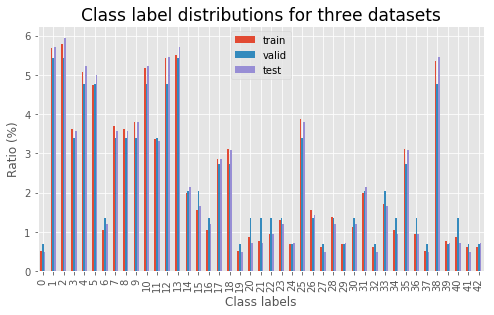

In [10]:
train_ratio = get_label_dist(y_train)
valid_ratio = get_label_dist(y_valid)
test_ratio = get_label_dist(y_test)

dist_table = pd.concat([train_ratio, valid_ratio, test_ratio], axis=1)
dist_table.columns = ['train', 'valid', 'test']
ax = dist_table.plot(kind='bar', figsize=(8, 4.5))
ax.set_ylabel('Ratio (%)', fontsize=12)
ax.set_xlabel('Class labels', fontsize=12)
ax.set_title('Class label distributions for three datasets', fontsize=17);

There was imbalance among the classes. The label data across the classes is not evenly distributed, however, all three data sets approximately share this characteristic

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

### 1. Converting to grayscale

In [7]:
import cv2

def convert_to_grayscale_3d(x):
    x = cv2.cvtColor(x, cv2.COLOR_RGB2GRAY)
    return np.expand_dims(x, 2)

def convert_to_grayscale(x):
    return cv2.cvtColor(x, cv2.COLOR_RGB2GRAY)


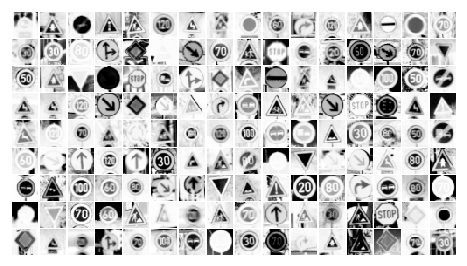

In [12]:
plots.display_square_grid(X_train, False, True)

### 2. Global constrast normalization

$$
X_{i, j, k} ^{'} = s \frac {X _{i, j, k} - \bar {X}}{max \{ \epsilon, \sqrt{\lambda + \frac{1}{3rc}\sum _{i=1}^{r} \sum _{i=1}^{c} \sum _{i=1}^{3} (X _{i, j, k} - \bar {X}) ^{2}} \}}
$$

In [8]:
def global_contrast_normalization(x, s=1, eps=1e-8, lambda_=1):
    return s * (x - x.mean()) / (max(eps, (((x - x.mean())** 2).mean() + lambda_) ** .5))

### 2. MinMax normalization


In [9]:
def minmax_normalization(x, eps=1e-8):
    return (x - x.min()) / ((x.max() - x.min()) + eps)

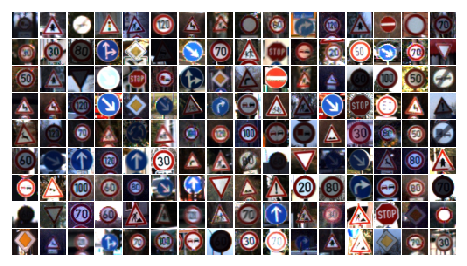

In [15]:
plots.display_square_grid(X_train, True, False)

It seems greyscale images dont benefit much from normalization. 

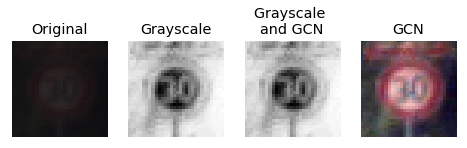

In [17]:
plots.compare_preprocessing_methods(X_train[123])

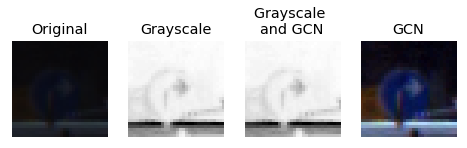

In [19]:
plots.compare_preprocessing_methods(X_train[138])

Sample images shown in figure 1 after contrast normalization and MinMax normalization

In [10]:
import traffic_signs_input as inputs
def preprocess_and_save(features, labels, is_color,  
                        dest, random_perturb=False,
                        save_output=False):
   
    if is_color:
        n_channel = 3
    
    else:
        n_channel = 1
    
    preprocessed = []
    for i, image in enumerate(features):
        if random_perturb:
            if random.uniform(0, 1) > .9:
                image = inputs.random_transform(image)
        
        if not is_color:
            image = convert_to_grayscale(image)
        
        image = global_contrast_normalization(image)
        image = minmax_normalization(image)
        preprocessed.append(image)
        
    preprocessed = np.array(preprocessed).reshape(
        (len(preprocessed), 32, 32, n_channel))
        
    if save_output:
        pickle.dump((preprocessed, labels), open(dest, 'wb')) 
    
    return preprocessed, labels


In [11]:
# X_train_color, y_train_color = preprocess_and_save(
#     X_train, y_train, True, "traffic-signs-data/train_preprocessed_color.p")

# X_train_gray, y_train_gray = preprocess_and_save(
#     X_train, y_train, False, "traffic-signs-data/train_preprocessed_gray.p")

# X_valid_color, y_valid_color = preprocess_and_save(
#     X_valid, y_valid, True, "traffic-signs-data/valid_preprocessed_color.p", True, False)

# X_valid_gray, y_valid_gray = preprocess_and_save(
#     X_valid, y_valid, False, "traffic-signs-data/valid_preprocessed_gray.p", True, False)

X_test_color, y_test_color = preprocess_and_save(
    X_test, y_test,  True, "traffic-signs-data/test_preprocessed_color.p")

X_test_gray, y_test_gray = preprocess_and_save(
    X_test, y_test,  False, "traffic-signs-data/test_preprocessed_gray.p")

In [24]:
utils.get_stats(X_train_color, y_train_color, "Train (color)")
utils.get_stats(X_train_gray, y_train_gray, "Train (grayscale)")
utils.get_stats(X_valid_color, y_valid_color, "Valid (color)")
utils.get_stats(X_valid_gray, y_valid_gray, "Valid (grayscale)")
utils.get_stats(X_test_color, y_test_color, "Test (color)")
utils.get_stats(X_test_gray, y_test_gray, "Test (grayscale)")


Dataset: Train (color) 
Number of examples: 34799
Image data shape: (32, 32, 3)
Min: 0.0000
Max: 1.0000
Mean: 0.3407
Std Dev: 0.2852
Number of classes: 43

Dataset: Train (grayscale) 
Number of examples: 34799
Image data shape: (32, 32, 1)
Min: 0.0000
Max: 1.0000
Mean: 0.3377
Std Dev: 0.2931
Number of classes: 43

Dataset: Valid (color) 
Number of examples: 4410
Image data shape: (32, 32, 3)
Min: 0.0000
Max: 1.0000
Mean: 0.3495
Std Dev: 0.2879
Number of classes: 43

Dataset: Valid (grayscale) 
Number of examples: 4410
Image data shape: (32, 32, 1)
Min: 0.0000
Max: 1.0000
Mean: 0.3449
Std Dev: 0.2944
Number of classes: 43

Dataset: Test (color) 
Number of examples: 12630
Image data shape: (32, 32, 3)
Min: 0.0000
Max: 1.0000
Mean: 0.3387
Std Dev: 0.2887
Number of classes: 43

Dataset: Test (grayscale) 
Number of examples: 12630
Image data shape: (32, 32, 1)
Min: 0.0000
Max: 1.0000
Mean: 0.3327
Std Dev: 0.2968
Number of classes: 43


### 3. Data augmentation 

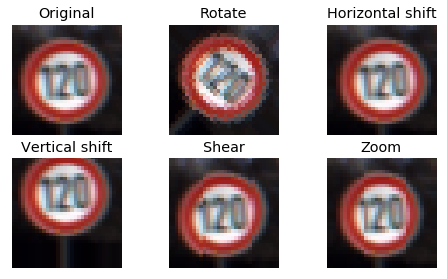

In [18]:
plots.show_preprocessed_example(X_train)

In [25]:
import keras.preprocessing.image as io

def random_transform(x, seed=42, rotation_range=30,
                     width_shift_range=.1, height_shift_range=.1,
                     shear_range=0.2, zoom_range = (.9, 1.1),
                     row_axis=0, col_axis=1, channel_axis=2):
    '''
    https://github.com/keras-team/keras/blob/master/keras/preprocessing/image.py
    :param x: 3D input image 
    :param seed: 
    :param rotation_range: Rotation range, in degrees.
    :param width_shift_range: Width shift range, as a float fraction of the width.
    :param height_shift_range: Height shift range, as a float fraction of the height.
    :param shear_range: Transformation intensity
    :param zoom_range: Tuple of floats; zoom range for width and height.
    :return: transformed image that has the same shape
    '''
    random.seed(seed)

    x = io.random_rotation(x, rotation_range, 
                           row_axis=row_axis, 
                           col_axis=col_axis, 
                           channel_axis=channel_axis)

    x = io.random_shift(x, width_shift_range, 
                        height_shift_range, 
                        row_axis=row_axis, 
                        col_axis=col_axis, 
                        channel_axis=channel_axis)

    x = io.random_shear(x, shear_range,
                       row_axis=row_axis, 
                        col_axis=col_axis, 
                        channel_axis=channel_axis)

    x = io.random_zoom(x, zoom_range, 
                       row_axis=row_axis, 
                       col_axis=col_axis, 
                       channel_axis=channel_axis)
    
    return x

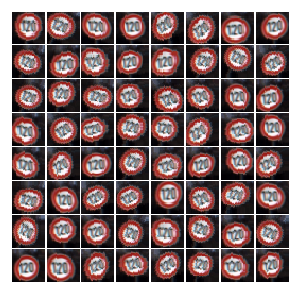

In [26]:
random.seed(42)

plt.figure(figsize=(5, 5))

for i in range(64):
    plt.subplot(8, 8, i + 1)
    plt.xticks(())
    plt.yticks(())
    image = random_transform(X_train[5])
    image = global_contrast_normalization(image)
    image = minmax_normalization(image)
    plt.imshow(image)


plt.subplots_adjust(wspace=0, hspace=0)    
plt.show()

In [27]:
def augment_examples(X, y, s=1,  
                     weights_on_scarce=.75, dataset_name="",
                     random_state=42, show_stats=True):
    '''
    generate randomly transformed example images
    :param X: list of 3D image dataset, shape = (r, c, channel)
    :param y: labels
    :param s: integer scale factor 
    :parma weights_on_scarse: correction factor on scarce label classes
    :param dataset_name: name of dataset being boosted  
    :param random_state
    :return: len(X) * s number of boosted examples
    '''
    
    n_channel = X[0].shape[-1]
    n_train = len(y)
    
    train_freq = get_label_dist(y)
    train_freq_normalized = minmax_normalization(train_freq, eps=1e-8)
    n_transform_list = np.floor((1 - weights_on_scarce * train_freq_normalized) * s)
    
    X_augmented = [ ]
    y_augmented = [ ]

    for i, image in enumerate(X):
        sys.stdout.write('\r>> Augmenting image %s (%.1f%%)' % (
            str(i), float(i + 1) / float(n_train) * 100.0))
        sys.stdout.flush()
        n_transform = int(n_transform_list[0][y[i]])

        for j in range(n_transform):
            image = random_transform(image)
            image = minmax_normalization(image)

            X_augmented.append(image)
            y_augmented.append(y[ i ])

    X_augmented = np.array(X_augmented).reshape(len(X_augmented), 32, 32, n_channel )
    X_augmented, y_augmented = shuffle(X_augmented, y_augmented, random_state=random_state)
    
    if show_stats:
        utils.get_stats(X_augmented, y_augmented, dataset_name)

    return X_augmented, y_augmented


In [28]:
X_train_augmented_gray, y_train_augmented_gray = augment_examples(
    X_train_gray, y_train_gray, 4, dataset_name="Train_augmented (gray)")

>> Augmenting image 34798 (100.0%)
Dataset: Train_augmented (gray) 
Number of examples: 64377
Image data shape: (32, 32, 1)
Min: 0.0000
Max: 1.0000
Mean: 0.3429
Std Dev: 0.2975
Number of classes: 43


In [29]:
X_train_large_gray = np.concatenate((X_train_gray, X_train_augmented_gray), axis=0)
y_train_large_gray = np.concatenate((y_train_gray, y_train_augmented_gray), axis=0)
X_train_large_gray, y_train_large_gray = shuffle(X_train_large_gray, y_train_large_gray, random_state=42)
utils.get_stats(X_train_large_gray, y_train_large_gray, "Original + Train_augmented (gray)")


Dataset: Original + Train_augmented (gray) 
Number of examples: 99176
Image data shape: (32, 32, 1)
Min: 0.0000
Max: 1.0000
Mean: 0.3411
Std Dev: 0.2960
Number of classes: 43


In [47]:
X_train_augmented_gray, y_train_augmented_gray = augment_examples(
    X_train_gray, y_train_gray, s=2, dataset_name="Train_augmented (gray)")

>> Augmenting image 34798 (100.0%)
Dataset: Train_augmented (gray) 
Number of examples: 20459
Image data shape: (32, 32, 1)
Min: 0.0000
Max: 1.0000
Mean: 0.3408
Std Dev: 0.2959
Number of classes: 35


In [48]:
20459 + 34798

55257

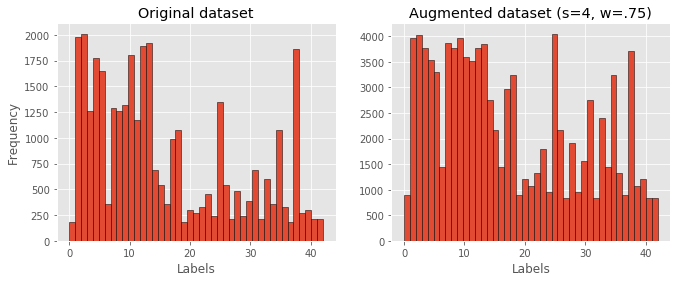

In [30]:
plt.figure(figsize=(11, 4))
plt.subplot(1, 2, 1)
frq, edges = np.histogram(y_train, 43)
plt.bar(edges[:-1], frq, width=np.diff(edges), ec="k", align="edge")
plt.xlabel("Labels")
plt.ylabel("Frequency")
plt.title("Original dataset")
plt.subplot(1, 2, 2)
frq, edges = np.histogram(y_train_large_gray, 43)
plt.bar(edges[:-1], frq, width=np.diff(edges), ec="k", align="edge")
plt.xlabel("Labels")
plt.title("Augmented dataset (s=4, w=.75)")
plt.show()

In [32]:
frq, edges = np.histogram(y_train, 43)
frq.max() / frq.min()

11.166666666666666

In [33]:
frq, edges = np.histogram(y_train_large_gray, 43)
frq.max() / frq.min()

4.8214285714285712

In [15]:
# pickle.dump((X_train_large_gray, y_train_large_gray),
#             open("traffic-signs-data/train_large_gray.p", "wb"),
#             protocol=2)

In [36]:
# X_train_augmented_color, y_train_augmented_color = augment_examples(
#     X_train_color, y_train_color, 4, False, "Train_augmented (color)")

>> Augmenting image 34798 (100.0%)
Dataset: Train_augmented (color) 
Number of examples: 64377
Image data shape: (32, 32, 3)
Min: 0.0000
Max: 1.0000
Mean: 0.3514
Std Dev: 0.2903
Number of classes: 43


In [37]:
# X_train_large_color = np.concatenate((X_train_color, X_train_augmented_color), axis=0)
# y_train_large_color = np.concatenate((y_train_color, y_train_augmented_color), axis=0)
# X_train_large_color, y_train_large_color = shuffle(X_train_large_color, y_train_large_color, random_state=42)
# utils.get_stats(X_train_large_color, y_train_large_color, "Original + Train_augmented (color)")


Dataset: Original + Train_augmented (color) 
Number of examples: 99176
Image data shape: (32, 32, 3)
Min: 0.0000
Max: 1.0000
Mean: 0.3476
Std Dev: 0.2885
Number of classes: 43


In [20]:
# pickle.dump((X_train_large_color, y_train_large_color),
#             open("traffic-signs-data/train_large_color.p", "wb"),
#            protocol=4)

# Checkpoint


In [1]:
import traffic_signs_input as inputs
X_train_large_gray, y_train_large_gray, X_valid_gray, y_valid_gray X_test_gray, y_test_gray = inputs.prepare_arugment_dataset(
    is_color=False, s=4) 

Using TensorFlow backend.


INFO Data set 
traffic-signs-data/train.p, 
traffic-signs-data/valid.p, 
traffic-signs-data/test.p
INFO from url: https://d17h27t6h515a5.cloudfront.net/topher/2017/February/5898cd6f_traffic-signs-data/traffic-signs-data.zip
INFO successfully downloaded and unzipped
>> Augmenting image 34798 (100.0%)
Dataset: Train_augmented (gray) 
Number of examples: 64377
Image data shape: (32, 32, 1)
Min: 0.0000
Max: 1.0000
Mean: 0.3456
Std Dev: 0.3017
Number of classes: 43

Dataset: Original + Train_augmented (gray) 
Number of examples: 99176
Image data shape: (32, 32, 1)
Min: 0.0000
Max: 1.0000
Mean: 0.3428
Std Dev: 0.2987
Number of classes: 43


In [ ]:
# X_train_large_color, y_train_large_color, X_valid_color, y_valid_color X_test_color, y_test_color = prepare_arugment_dataset(is_color=True, s=4)

In [23]:
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.1.0
Default GPU Device: /gpu:0


# Model Architecture

In [12]:

import tensorflow as tf
def conv2d_maxpool(features, filters, layer_name, 
                   conv_kernel_size=(5, 5), conv_strides=1, 
                   pool_kernel_size=(2, 2), pool_strides=2,
                   padding='same', is_training=True):
    
    with tf.name_scope(layer_name):
        net = tf.layers.conv2d(
            features,
            filters=filters,
            kernel_size=conv_kernel_size,
            strides=conv_strides,
            kernel_initializer= tf.truncated_normal_initializer(0.0, 0.1),
            padding='same',
            activation=tf.nn.relu)
        tf.summary.histogram('activations', net)
        
        #net = tf.layers.batch_normalization(net, training=is_training)
        
        net = tf.layers.max_pooling2d(
            net,
            pool_size=pool_kernel_size,
            strides=pool_strides,
            padding='same'
        )
    return net


def flatten(features):
    shape = features.get_shape().as_list()[1:]
    flat_dim = shape[0] * shape[1] * shape[2]
    return tf.reshape(features, [-1, flat_dim])

In [13]:
def lenet(features, keep_prob=.5, is_training=True):
    net = conv2d_maxpool(features, 6, 'Conv1', padding='valid')
    net = conv2d_maxpool(net, 16, 'Conv2', padding='valid')
    net = flatten(net)
    net = tf.layers.dense(net, 120, name='FC1', activation=tf.nn.relu)
    net = tf.layers.dense(net, 84, name='FC2', activation=tf.nn.relu)
    logits = tf.layers.dense(net, 43, name='Out')
    return logits

def cnn_base(features, keep_prob=.5, is_training=True):
    net = conv2d_maxpool(features, 16, 'Conv1')
    net = conv2d_maxpool(net, 32, 'Conv2')
    net = flatten(net)
    net = tf.layers.dense(net, 256, name='FC1', activation=tf.nn.relu)
    net = tf.layers.dense(net, 84, name='FC2', activation=tf.nn.relu)
    net = tf.nn.dropout(net, keep_prob, name='dropout3')
    logits = tf.layers.dense(net, 43, name='Out')
    return logits

def cnn_deep(features, keep_prob=.5, is_training=True):
    net = conv2d_maxpool(features, 16, 'Conv1')
    net = conv2d_maxpool(net, 32, 'Conv2')
    net = conv2d_maxpool(net, 64, 'Conv3')
    net = flatten(net)
    net = tf.layers.dense(net, 120, name='FC1', activation=tf.nn.relu)
    net = tf.nn.dropout(net, keep_prob, name='dropout2')
    net = tf.layers.dense(net, 84, name='FC2', activation=tf.nn.relu)
    net = tf.nn.dropout(net, keep_prob, name='dropout3')
    logits = tf.layers.dense(net, 43, name='Out')
    return logits

def cnn_wide(features, keep_prob=.5, is_training=True):
    net = conv2d_maxpool(features, 32, 'Conv1')
    net = conv2d_maxpool(net, 64, 'Conv2')
    net = flatten(net)
    net = tf.layers.dense(net, 120, name='FC1', activation=tf.nn.relu)
    net = tf.nn.dropout(net, keep_prob, name='dropout2')
    net = tf.layers.dense(net, 84, name='FC2', activation=tf.nn.relu)
    net = tf.nn.dropout(net, keep_prob, name='dropout3')
    logits = tf.layers.dense(net, 43, name='Out')
    return logits


def cnn_wide2(features, keep_prob=.5, is_training=True):
    net = conv2d_maxpool(features, 16, 'Conv1')
    net = conv2d_maxpool(net, 32, 'Conv2')
    net = tf.nn.dropout(net, keep_prob, name='dropout')
    net = flatten(net)
    net = tf.layers.dense(net, 1024, name='FC1', activation=tf.nn.relu)
    net = tf.nn.dropout(net, keep_prob, name='dropout2')
    net = tf.layers.dense(net, 84, name='FC2', activation=tf.nn.relu)
    net = tf.nn.dropout(net, keep_prob, name='dropout2')
    logits = tf.layers.dense(net, 43, name='Out')
    return logits


def cnn_wider(features, keep_prob=.5, is_training=True):
    net = conv2d_maxpool(features, 128, 'Conv1')
    net = conv2d_maxpool(net, 256, 'Conv2')
    net = flatten(net)
    net = tf.layers.dense(net, 120, name='FC1', activation=tf.nn.relu)
    net = tf.nn.dropout(net, keep_prob, name='dropout2')
    net = tf.layers.dense(net, 84, name='FC2', activation=tf.nn.relu)
    net = tf.nn.dropout(net, keep_prob, name='dropout3')
    logits = tf.layers.dense(net, 43, name='Out')
    return logits


def cnn_wider2(features, keep_prob=.5, is_training=True):
    net = conv2d_maxpool(features, 16, 'Conv1')
    net = conv2d_maxpool(features, 128, 'Conv1')
    net = conv2d_maxpool(net, 256, 'Conv2')
    net = flatten(net)
    net = tf.layers.dense(net, 256, name='FC1', activation=tf.nn.relu)
    net = tf.nn.dropout(net, keep_prob, name='dropout2')
    net = tf.layers.dense(net, 84, name='FC2', activation=tf.nn.relu)
    net = tf.nn.dropout(net, keep_prob, name='dropout3')
    logits = tf.layers.dense(net, 43, name='Out')
    return logits


def cnn_wide_deep(features, keep_prob=.5, is_training=True):
    net = conv2d_maxpool(features, 16, 'Conv1')
    net = conv2d_maxpool(features, 32, 'Conv2')
    net = conv2d_maxpool(net, 64, 'Conv3')
    net = flatten(net)
    net = tf.layers.dense(net, 256, name='FC1', activation=tf.nn.relu)
    net = tf.layers.dense(net, 84, name='FC2', activation=tf.nn.relu)
    net = tf.nn.dropout(net, keep_prob, name='dropout3')
    logits = tf.layers.dense(net, 43, name='Out')
    return logits


def cnn_small_kernel(features, keep_prob=.5, is_training=True):
    net = conv2d_maxpool(features, 16, 'Conv1', conv_kernel_size=(3, 3))
    net = conv2d_maxpool(net, 32, 'Conv2', conv_kernel_size=(3, 3))
    net = flatten(net)
    net = tf.layers.dense(net, 256, name='FC1', activation=tf.nn.relu)
    net = tf.nn.dropout(net, keep_prob, name='dropout2')
    net = tf.layers.dense(net, 84, name='FC2', activation=tf.nn.relu)
    net = tf.nn.dropout(net, keep_prob, name='dropout3')
    logits = tf.layers.dense(net, 43, name='Out')
    return logits

def cnn_small_kernel_wide(features, keep_prob=.5, is_training=True):
    net = conv2d_maxpool(features, 64, 'Conv1', conv_kernel_size=(3, 3))
    net = conv2d_maxpool(net, 128, 'Conv2', conv_kernel_size=(3, 3))
    net = flatten(net)
    net = tf.layers.dense(net, 256, name='FC1', activation=tf.nn.relu)
    net = tf.nn.dropout(net, keep_prob, name='dropout2')
    net = tf.layers.dense(net, 84, name='FC2', activation=tf.nn.relu)
    net = tf.nn.dropout(net, keep_prob, name='dropout3')
    logits = tf.layers.dense(net, 43, name='Out')
    return logits


def cnn_small_kernel_deep(features, keep_prob=.5, is_training=True):
    net = conv2d_maxpool(features, 16, 'Conv1', conv_kernel_size=(3, 3))
    net = conv2d_maxpool(net, 32, 'Conv2', conv_kernel_size=(3, 3))
    net = conv2d_maxpool(net, 64, 'Conv3', conv_kernel_size=(3, 3))
    net = flatten(net)
    net = tf.layers.dense(net, 256, name='FC1', activation=tf.nn.relu)
    net = tf.nn.dropout(net, keep_prob, name='dropout2')
    net = tf.layers.dense(net, 84, name='FC2', activation=tf.nn.relu)
    net = tf.nn.dropout(net, keep_prob, name='dropout3')
    logits = tf.layers.dense(net, 43, name='Out')
    return logits

def cnn_small_kernel_deep_wide(features, keep_prob=.5, is_training=True):
    net = conv2d_maxpool(features, 32, 'Conv1', conv_kernel_size=(3, 3))
    net = conv2d_maxpool(net, 64, 'Conv2', conv_kernel_size=(3, 3))
    net = conv2d_maxpool(net, 128, 'Conv3', conv_kernel_size=(3, 3))
    net = flatten(net)
    net = tf.layers.dense(net, 256, name='FC1', activation=tf.nn.relu)
    net = tf.nn.dropout(net, keep_prob, name='dropout2')
    net = tf.layers.dense(net, 84, name='FC2', activation=tf.nn.relu)
    net = tf.nn.dropout(net, keep_prob, name='dropout3')
    logits = tf.layers.dense(net, 43, name='Out')
    return logits


def cnn_small_kernel_deep_wide2(features, keep_prob=.5, is_training=True):
    net = conv2d_maxpool(features, 32, 'Conv1', conv_kernel_size=(3, 3))
    net = conv2d_maxpool(net, 64, 'Conv2', conv_kernel_size=(3, 3))
    net = conv2d_maxpool(net, 128, 'Conv3', conv_kernel_size=(3, 3))
    net = flatten(net)
    net = tf.layers.dense(net, 512, name='FC1', activation=tf.nn.relu)
    net = tf.nn.dropout(net, keep_prob, name='dropout2')
    net = tf.layers.dense(net, 84, name='FC2', activation=tf.nn.relu)
    net = tf.nn.dropout(net, keep_prob, name='dropout3')
    logits = tf.layers.dense(net, 43, name='Out')
    return logits


def cnn_wide_deep2(features, keep_prob=.5, is_training=True):
    net = conv2d_maxpool(features, 32, 'Conv1')
    net = conv2d_maxpool(net, 64, 'Conv2')
    net = conv2d_maxpool(net, 128, 'Conv3')
    net = flatten(net)
    net = tf.layers.dense(net, 1024, name='FC1', activation=tf.nn.relu)
    net = tf.nn.dropout(net, keep_prob, name='dropout2')
    net = tf.layers.dense(net, 84, name='FC2', activation=tf.nn.relu)
    net = tf.nn.dropout(net, keep_prob, name='dropout3')
    logits = tf.layers.dense(net, 43, name='Out')
    return logits


def cnn_deepx2_wide(features, keep_prob=.5, is_training=True):
    net = conv2d_maxpool(features, 16, 'Conv1', conv_kernel_size=(3, 3))
    net = conv2d_maxpool(features, 32, 'Conv2', conv_kernel_size=(3, 3))
    net = conv2d_maxpool(net, 64, 'Conv3', conv_kernel_size=(3, 3))
    net = conv2d_maxpool(net, 128, 'Conv4', conv_kernel_size=(3, 3))
    net = flatten(net)
    net = tf.layers.dense(net, 512, name='FC1', activation=tf.nn.relu)
    net = tf.nn.dropout(net, keep_prob, name='dropout2')
    net = tf.layers.dense(net, 84, name='FC2', activation=tf.nn.relu)
    net = tf.nn.dropout(net, keep_prob, name='dropout3')
    logits = tf.layers.dense(net, 43, name='Out')
    return logits


def cnn_best(features, keep_prob=0.5, is_training=True):
    net = conv2d_maxpool(features, 16, 'Conv1')
    net = conv2d_maxpool(net, 32, 'Conv2')
    net = conv2d_maxpool(net, 64,'Conv3', conv_kernel_size=(3, 3))
    net = flatten(net)
    net = tf.layers.dense(net, 256, activation=tf.nn.relu)
    net = tf.nn.dropout(net, keep_prob)
    net = tf.layers.dense(net, 84, activation=tf.nn.relu)
    net = tf.nn.dropout(net, keep_prob)
    logits = tf.layers.dense(net, 43)
    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [14]:
batch_size = 128
learning_rate = .001
epochs = 35
print_every = 100
evaluate_every = 500
checkpoint_every = 5
iteration = 0

In [15]:
checkpoint_dir = "checkpoint"
if not tf.gfile.Exists(checkpoint_dir):
    tf.gfile.MakeDirs(checkpoint_dir)
    
log_dir = "log"
if not tf.gfile.Exists(log_dir):
    tf.gfile.MakeDirs(log_dir)

save_model_path = "checkpoint/tmp"
#save_model_path = 'checkpoint/cnn_small_kernel_deep_wide_s4w75_lr_001'

In [121]:
def load_batch(X, y, batch_size=batch_size):
    for start in range(0, len(X), batch_size):
        end = min(len(X), start + batch_size)
        yield X[start:end], y[start:end]

In [122]:
def evaluate(X_valid, y_valid):
    
    val_feed = {X_: X_valid,
                y_: y_valid,
                keep_prob_pl: 1.0,
                is_training_: False}
    
    val_loss, val_acc = sess.run([cost, accuracy], feed_dict=val_feed)
    
    print("\n==================================="
          "\nEpoch: {}/{}".format(e + 1, epochs),
          " Iteration: {}".format(iteration),
          "\nValidation set loss: {:.4f}".format(val_loss), 
          "\nValidation set accuracy: {:.4f}".format(val_acc),
          "\n===================================\n")
    
    return val_acc

In [16]:
def test_accuracy(X_test, y_test):
    
    test_feed = {X_: X_test,
                y_: y_test,
                keep_prob_pl: 1.0,
                is_training_: False}
    
    test_loss, test_acc = sess.run([accuracy], feed_dict=test_feed)
    
    print("\n==================================="
          "\nTest Acc: {:.4f}".format(test_acc),
          "\n===================================\n")

In [ ]:
with tf.Graph().as_default():
    
    tf.logging.set_verbosity(tf.logging.INFO)
    
    # Inputs
    X_ = tf.placeholder(tf.float32, (None, 32, 32, 1), 'input_features')
    y_ = tf.placeholder(tf.int32, (None), 'labels')
    keep_prob_pl = tf.placeholder(tf.float32, name = "keep_prob")
    is_training_ = tf.placeholder(tf.bool, name="is_training")
    
    # CNN model
    logits = cnn_small_kernel_deep_wide(X_, keep_prob_pl, is_training_)
    logits = tf.identity(logits, name='logits')
    
    # Loss and optimizer
    one_hot_y = tf.one_hot(y_, depth=43)
    with tf.name_scope('loss'):
        cross_entropy = tf.nn.softmax_cross_entropy_with_logits(
            labels=one_hot_y, logits=logits)
        cost = tf.reduce_mean(cross_entropy, name='xentropy')
    
    
    with tf.name_scope('train'):
        update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
        with tf.control_dependencies(update_ops):
            optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost) 
    
    # Performance metrics: Accuracy
    with tf.name_scope('accuracy'):
        with tf.name_scope('correct_prediction'):
            probability = tf.nn.softmax(logits, name='prediction')
            correct_pred = tf.equal(tf.argmax(probability, 1), 
                                tf.argmax(one_hot_y, 1))
        with tf.name_scope('accuracy'):
            accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name='accuracy')
    
    tf.summary.scalar('xentropy', cost)
    tf.summary.scalar('accuracy', accuracy) 
    merged = tf.summary.merge_all()
    
    saver = tf.train.Saver()
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        sess.run(tf.local_variables_initializer())
        train_writer = tf.summary.FileWriter('log', sess.graph)
    
        for e in range(epochs):
#             for x, y in load_batch(X_train_color, y_train_color):
            for x, y in load_batch(X_train_large_gray, y_train_large_gray):
                feed = {X_: x, y_: y, keep_prob_pl: 0.5, is_training_:True}
                loss, train_accuracy, _ , summary_ = sess.run([cost, accuracy, optimizer, merged], feed_dict=feed)
                train_writer.add_summary(summary_, iteration)
                
                if iteration % print_every == 0:
                    print("Epoch: {}/{}".format(e+1, epochs),
                          "Iteration: {}".format(iteration),
                          "Training set loss: {:.4f}".format(loss),
                          "Training set accuracy: {:.4f}".format(train_accuracy))
                iteration += 1
#             val_acc = evaluate(X_valid_color, y_valid_color)
            val_acc = evaluate(X_valid_gray, y_valid_gray)
            if e % checkpoint_every == 0 and e > 0:
                save_model_path_ = save_model_path + "_epoch_" + str(e) + "_valacc_" + str(val_acc) 
                saver.save(sess, save_model_path_)
                print("Model saved: {}".format(save_model_path_))

In [204]:
import sys
from sklearn.metrics import precision_score, recall_score, confusion_matrix, accuracy_score

def test_model(save_model_path, test_features, test_labels):
    loaded_graph = tf.Graph()

    with tf.Session(graph=loaded_graph) as sess:
        
        # Load model
        loader = tf.train.import_meta_graph(save_model_path + '.meta')
        loader.restore(sess, save_model_path)

        # Get Tensors from loaded model
        loaded_x = loaded_graph.get_tensor_by_name('input_features:0')
        loaded_y = loaded_graph.get_tensor_by_name('labels:0')
        loaded_keep_prob = loaded_graph.get_tensor_by_name('keep_prob:0')
        loaded_logits = loaded_graph.get_tensor_by_name('logits:0')
        loaded_acc = loaded_graph.get_tensor_by_name('accuracy/accuracy/accuracy:0')
        loaded_preds = loaded_graph.get_tensor_by_name('accuracy/correct_prediction/prediction:0')

        stats = {
            'steps': [],
            'preds': [],
            'true_labels': []
        }
        
        n_image = len(test_labels)
        # Get accuracy in batches for memory limitations
        for i, (x, y) in enumerate(zip(test_features, test_labels)):
            x = np.expand_dims(x, 0)
            test_feed = {loaded_x: x,
                         loaded_keep_prob: 1.0}

            test_preds = sess.run([loaded_preds], feed_dict=test_feed)  
            stats['steps'].append(i)
            stats['preds'].append(np.argmax(test_preds))
            stats['true_labels'].append(y)
            
            sys.stdout.write('\r>> Predicting image %s (%.1f%%)' % (
            str(i), float(i + 1) / float(n_image) * 100.0))
            sys.stdout.flush()
    
    return stats

In [119]:
def show_results(stats, dataset_name):
    print("\n===============================================")
    print("Dataset: " + dataset_name)
    print("Accuracy: {:.5f}".format(accuracy_score(stats['true_labels'], stats['preds'])))
    print("Precision: {:.5f}".format(precision_score(stats['true_labels'], stats['preds'],
                                   average='weighted')))
    print("Recall: {:.5f}".format(recall_score(stats['true_labels'], 
                                   stats['preds'],
                                   average='weighted')))
    print("")

In [126]:
best_model_path = "checkpoint/cnn_small_kernel_deep_wide_s4w75_lr_001_epoch_20_valacc_0.968254"
final_test_stats = test_model(best_model_path, X_train_gray, y_train_gray)
show_results(final_test_stats, "Train")
final_test_stats = test_model(best_model_path, X_valid_gray, y_valid_gray)
show_results(final_test_stats, "Valid")
final_test_stats = test_model(best_model_path, X_test_gray, y_test_gray)
show_results(final_test_stats, "Test")

INFO:tensorflow:Restoring parameters from checkpoint/cnn_small_kernel_deep_wide_s4w75_lr_001_epoch_20_valacc_0.968254
INFO Restoring parameters from checkpoint/cnn_small_kernel_deep_wide_s4w75_lr_001_epoch_20_valacc_0.968254
>> Predicting image 34798 (100.0%)===============================================
Dataset: Train
Accuracy: 0.99940
Precision: 0.99940
Recall: 0.99940

INFO:tensorflow:Restoring parameters from checkpoint/cnn_small_kernel_deep_wide_s4w75_lr_001_epoch_20_valacc_0.968254
INFO Restoring parameters from checkpoint/cnn_small_kernel_deep_wide_s4w75_lr_001_epoch_20_valacc_0.968254
>> Predicting image 4409 (100.0%)===============================================
Dataset: Valid
Accuracy: 0.96848
Precision: 0.97117
Recall: 0.96848

INFO:tensorflow:Restoring parameters from checkpoint/cnn_small_kernel_deep_wide_s4w75_lr_001_epoch_20_valacc_0.968254
INFO Restoring parameters from checkpoint/cnn_small_kernel_deep_wide_s4w75_lr_001_epoch_20_valacc_0.968254
>> Predicting image 1262

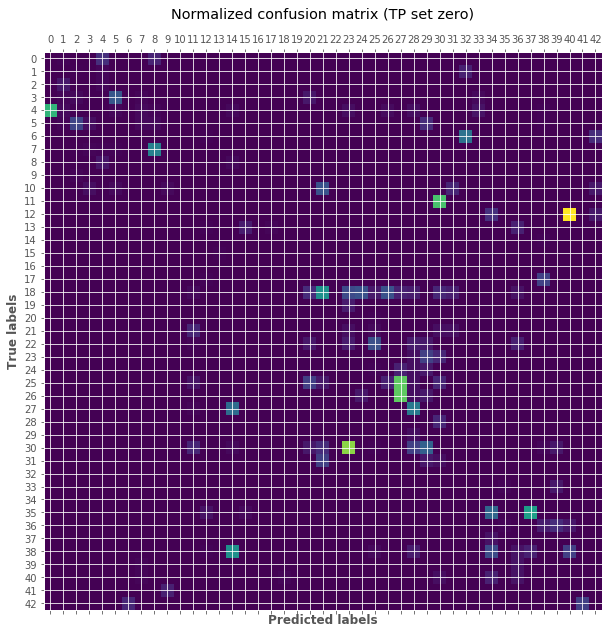

In [112]:
plt.figure(figsize=(10, 10))
conf_mat = confusion_matrix(final_test_stats['true_labels'], final_test_stats['preds'])
norm_conf_mat = conf_mat / conf_mat.sum(axis=1)
np.fill_diagonal(norm_conf_mat, 0)
plt.matshow(norm_conf_mat, fignum=1)
plt.xticks(list(range(43)))
plt.yticks(list(range(43)))
plt.xlabel("Predicted labels", fontweight='bold')
plt.ylabel("True labels", fontweight='bold')
plt.title("Normalized confusion matrix (TP set zero)")
plt.show()

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

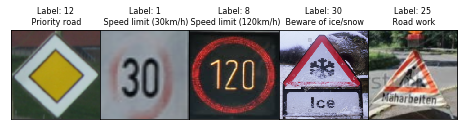

In [17]:
import matplotlib.pyplot as plt

true_index = [12, 1, 8, 30, 25]
true_labels = ["Priority road", "Speed limit (30km/h)",
              "Speed limit (120km/h)", "Beware of ice/snow",
              "Road work"]

plt.figure(figsize=(8, 3))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    img_path = "images/test_" + str(i + 1) + ".png"
    image = plt.imread(img_path)
    image = cv2.resize(image, (200, 200))
    plt.imshow(image)
    plt.title("Label: " + str(true_index[i]) + "\n {}".format(true_labels[i]),
             fontsize=8)
    plt.xticks(())
    plt.yticks(())
    
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

### Predict the Sign Type for Each Image

In [18]:
def preprocess(img_path):
    image = plt.imread(img_path)

    # upsample or downsample to 32 * 32 * 3 
    image = cv2.resize(image, (32, 32))

    # grayscaling 
    image = convert_to_grayscale_3d(image)
    image = global_contrast_normalization(image)
    image = minmax_normalization(image)
    return image

In [19]:
import cv2
def preprocess_test_examples():
    preprocessed = []
    
    for i in range(5):
        img_path = "images/test_" + str(i + 1) + ".png"
        image = plt.imread(img_path)
        
        # upsample or downsample to 32 * 32 * 3 
        image = cv2.resize(image, (32, 32))
        
        # grayscaling 
        image = convert_to_grayscale_3d(image)
        image = global_contrast_normalization(image)
        image = minmax_normalization(image)
        preprocessed.append(np.expand_dims(image, 0))
    
    return np.concatenate(preprocessed, 0)

In [20]:
preprocessed = preprocess_test_examples()

# plt.figure(figsize=(8, 3))
# for i in range(5):
#     plt.subplot(1, 5, i + 1)
#     plt.imshow(np.squeeze(preprocessed[i]), cmap="Greys")
#     plt.xticks(())
#     plt.yticks(())
# plt.subplots_adjust(wspace=0, hspace=0)
# plt.show()

In [21]:
import tensorflow as tf
import numpy as np

def predict_from_trained_model(save_model_path, test_images):
    loaded_graph = tf.Graph()

    with tf.Session(graph=loaded_graph) as sess:
        
        # Load model
        loader = tf.train.import_meta_graph(save_model_path + '.meta')
        loader.restore(sess, save_model_path)

        # Get Tensors from loaded model
        loaded_x = loaded_graph.get_tensor_by_name('input_features:0')
        loaded_keep_prob = loaded_graph.get_tensor_by_name('keep_prob:0')
        loaded_preds = loaded_graph.get_tensor_by_name('accuracy/correct_prediction/prediction:0')
        
        predictions = []
        softmax_probs = []
        
        if np.ndim(test_images) == 4:
            for x in test_images:
                x = np.expand_dims(x, 0)
                test_feed = {loaded_x: x,
                             loaded_keep_prob: 1.0}
                softmax_prob = sess.run([loaded_preds], feed_dict=test_feed)
                predictions.append(np.argmax(softmax_prob))
                softmax_probs.append(softmax_prob)
        
        else:
            x = np.expand_dims(test_images, 0)
            test_feed = {loaded_x: x,
                         loaded_keep_prob: 1.0}
            softmax_prob = sess.run([loaded_preds], feed_dict=test_feed)
            predictions.append(np.argmax(softmax_prob))
            softmax_probs.append(softmax_prob)
            
    return predictions, softmax_probs

In [22]:
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
%matplotlib inline
mycol = sns.husl_palette(10)[0]


def show_predicted(save_model_path, test_image, true_label):
    
    _, softmax_probs = predict_from_trained_model(save_model_path, test_image)
    
    sign_names = pd.read_csv("traffic-signs-data/signnames.csv")
    softmax_probs =  pd.DataFrame(softmax_probs[0][0].reshape(43, 1), columns=['softmax_prob'])
    
    tmp_table = pd.concat([sign_names, softmax_probs], 1)
    tmp_table = tmp_table.sort_values(by = "softmax_prob", ascending=False)
    top5 = tmp_table.iloc[:5, ]
    
    plt.figure(figsize=(10, 4)) 
    gs = gridspec.GridSpec(1, 2, width_ratios=[4, 1])
    ax0 = plt.subplot(gs[0])
    ax0.imshow(np.squeeze(test_image), cmap="Greys")
    ax0.set_xticks(())
    ax0.set_yticks(())
    ax0.set_title("Preprocessed input image \n True label: {}".format(true_label))

    ax1 = plt.subplot(gs[1])
    sns.barplot(x="softmax_prob", y='SignName', data=top5, color=mycol, edgecolor=".2")
    ax1.set_xlim((0, 1))
    ax1.set_xlabel("")
    ax1.set_ylabel("")
    ax1.set_yticks(())
    ax1.set_xticks(())

    ax1.set_title("Top 5 Predicted Traffic Signs")
    for i, p in enumerate(ax1.patches):
        ax1.annotate(top5.iloc[i, 1], 
                       (p.get_width() * 0.9, p.get_y()+.4), fontweight='bold')
        ax1.annotate(np.round(top5.iloc[i, 2], 4), (p.get_width() * 0.9, p.get_y()+.6))
    plt.tight_layout()
    plt.show();

    
    return top5
    
    

### Analyze Performance

In [23]:
best_model_path = "checkpoint/cnn_small_kernel_deep_wide_s4w75_lr_001_epoch_20_valacc_0.968254"
preprocessed = preprocess_test_examples()
predictions, _ = predict_from_trained_model(best_model_path, preprocessed)

INFO:tensorflow:Restoring parameters from checkpoint/cnn_small_kernel_deep_wide_s4w75_lr_001_epoch_20_valacc_0.968254
INFO Restoring parameters from checkpoint/cnn_small_kernel_deep_wide_s4w75_lr_001_epoch_20_valacc_0.968254


In [24]:
true_index

[12, 1, 8, 30, 25]

In [25]:
predictions

[12, 1, 14, 23, 0]

In [26]:
from sklearn.metrics import accuracy_score
print("Accuracy: {:.5f}".format(accuracy_score(true_index, predictions))) 

Accuracy: 0.40000


The final model predicted only two out of five images accurately. The resulted accuracy is disappointing considering we had over 95% test accuracy. 

### Output Top 5 Softmax Probabilities For Each Image Found on the Web


INFO:tensorflow:Restoring parameters from checkpoint/cnn_small_kernel_deep_wide_s4w75_lr_001_epoch_20_valacc_0.968254
INFO Restoring parameters from checkpoint/cnn_small_kernel_deep_wide_s4w75_lr_001_epoch_20_valacc_0.968254


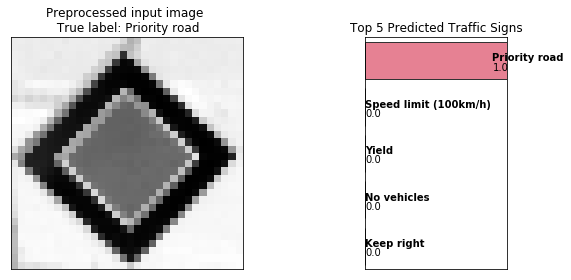

In [27]:
best_model_path = "checkpoint/cnn_small_kernel_deep_wide_s4w75_lr_001_epoch_20_valacc_0.968254"
_ = show_predicted(best_model_path, preprocessed[0], true_labels[0])

INFO:tensorflow:Restoring parameters from checkpoint/cnn_small_kernel_deep_wide_s4w75_lr_001_epoch_20_valacc_0.968254
INFO Restoring parameters from checkpoint/cnn_small_kernel_deep_wide_s4w75_lr_001_epoch_20_valacc_0.968254


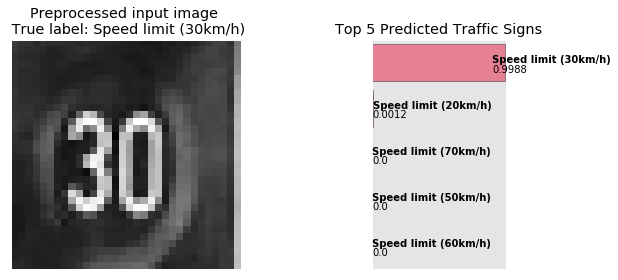

In [100]:
_ = show_predicted(best_model_path, preprocessed[1], true_labels[1])

INFO:tensorflow:Restoring parameters from checkpoint/cnn_small_kernel_deep_wide_s4w75_lr_001_epoch_20_valacc_0.968254
INFO Restoring parameters from checkpoint/cnn_small_kernel_deep_wide_s4w75_lr_001_epoch_20_valacc_0.968254


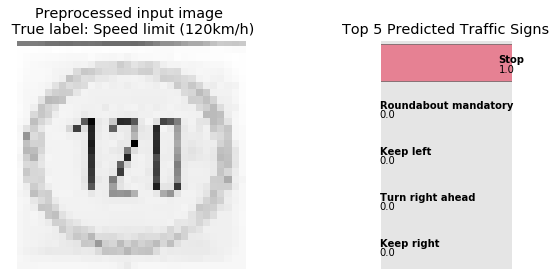

In [101]:
_ = show_predicted(best_model_path, preprocessed[2], true_labels[2])

INFO:tensorflow:Restoring parameters from checkpoint/cnn_small_kernel_deep_wide_s4w75_lr_001_epoch_20_valacc_0.968254
INFO Restoring parameters from checkpoint/cnn_small_kernel_deep_wide_s4w75_lr_001_epoch_20_valacc_0.968254


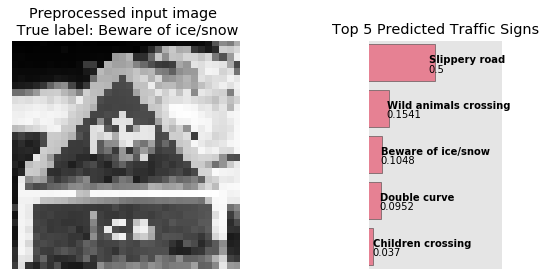

In [102]:
_ = show_predicted(best_model_path, preprocessed[3], true_labels[3])

INFO:tensorflow:Restoring parameters from checkpoint/cnn_small_kernel_deep_wide_s4w75_lr_001_epoch_20_valacc_0.968254
INFO Restoring parameters from checkpoint/cnn_small_kernel_deep_wide_s4w75_lr_001_epoch_20_valacc_0.968254


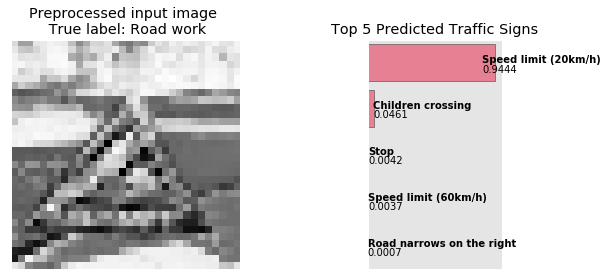

In [103]:
_ = show_predicted(best_model_path, preprocessed[4], true_labels[4])

Out of a total of five test images provided, the model predicted accurately twice, completely guessed wrong twice.   

In [70]:
test6_path = "images/test_6.png"
test6 = preprocess(test6_path)

INFO:tensorflow:Restoring parameters from checkpoint/cnn_small_kernel_deep_wide_s4w75_lr_001_epoch_20_valacc_0.968254
INFO Restoring parameters from checkpoint/cnn_small_kernel_deep_wide_s4w75_lr_001_epoch_20_valacc_0.968254


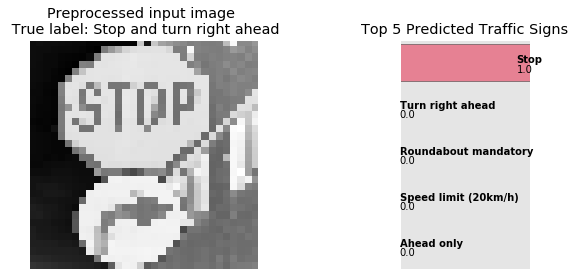

In [71]:
_ = show_predicted(best_model_path, test6, "Stop and turn right ahead")

In [89]:
test7_path = "images/resized_test_5.png"
test7 = preprocess(test7_path)

INFO:tensorflow:Restoring parameters from checkpoint/cnn_small_kernel_deep_wide_s4w75_lr_001_epoch_20_valacc_0.968254
INFO Restoring parameters from checkpoint/cnn_small_kernel_deep_wide_s4w75_lr_001_epoch_20_valacc_0.968254


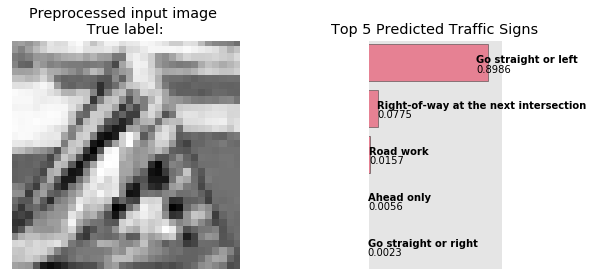

In [90]:
_ = show_predicted(best_model_path, test7, "")

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [96]:
model_path = "checkpoint/cnn_small_kernel_deep_wide_s4w75_lr_001_epoch_20_valacc_0.968254"
def get_activation(x, model_path):
    x = np.expand_dims(x, 0)
    
    loaded_graph = tf.Graph()
    with tf.Session(graph=loaded_graph) as sess:
        loader = tf.train.import_meta_graph(best_model_path + '.meta')
        loader.restore(sess, best_model_path)

        loaded_x = loaded_graph.get_tensor_by_name('input_features:0')
        loaded_keep_prob = loaded_graph.get_tensor_by_name('keep_prob:0')
        layer1_activation = loaded_graph.get_tensor_by_name('Conv1/conv2d/Relu:0')
        layer2_activation = loaded_graph.get_tensor_by_name('Conv2/conv2d/Relu:0')
        layer3_activation = loaded_graph.get_tensor_by_name('Conv3/conv2d/Relu:0')
        sess.run(tf.global_variables_initializer())
        act1, act2, act3 = sess.run([layer1_activation,
                                    layer2_activation,
                                    layer3_activation], 
                                  feed_dict={loaded_x: x, loaded_keep_prob: 1.0})
        return act1, act2, act3

In [105]:
deconv1.shape

(1, 32, 32, 1)

In [107]:
from imageio import imwrite
import warnings
warnings.filterwarnings('ignore')

act1, act2, act3 = get_activation(image, model_path)
sess = tf.InteractiveSession()

for i in range(32):
    isolated = act1.copy()
    isolated[:, :, :, :i] = 0
    isolated[:, :, :, i + 1:] = 0

    layer1_activation = tf.placeholder(tf.float32, [None, 32, 32, 32])
    layer1_relu = tf.nn.relu(layer1_activation)
    layer1_filtered = tf.layers.conv2d_transpose(
        layer1_relu, 1, kernel_size=5, strides=1,
        padding='same',
        bias_initializer=tf.zeros_initializer(),
        kernel_initializer=tf.contrib.layers.xavier_initializer())

    sess.run(tf.global_variables_initializer())
    deconv1 = layer1_filtered.eval(feed_dict={layer1_activation:isolated})
    imwrite("layer1_feature{}.png".format(i), deconv1[0])


In [118]:
def display_featuremap(image, model_path, show_layer1=False, show_layer2=False, show_layer3=False):
    
    act1, act2, act3 = get_activation(image, model_path)
    
    plt.figure(figsize=(1.5, 1.5))
    plt.imshow(np.squeeze(image), cmap="gray", interpolation="nearest")
    plt.title("Perprocessed image input")
    
    if show_layer1:
        plt.figure(figsize=(16, 8))
        for i in range(act1.shape[-1]):
            plt.subplot(4, 8, i + 1)
            plt.imshow(act1[0, :, :, i],
                      interpolation="nearest", cmap="gray")
            plt.xticks(())
            plt.yticks(())
        plt.subplots_adjust(wspace=0, hspace=0)
        
    if show_layer2:
        plt.figure(figsize=(8, 8))
        for i in range(act2.shape[-1]):
            plt.subplot(8, 8, i + 1)
            plt.imshow(act2[0, :, :, i], interpolation="nearest", cmap="gray")
            plt.xticks(())
            plt.yticks(())
        plt.subplots_adjust(wspace=0, hspace=0)

        
    if show_layer3:
        plt.figure(figsize=(16, 8))
        for i in range(act3.shape[-1]):
            plt.subplot(8, 16, i + 1)
            plt.imshow(act3[0, :, :, i], interpolation="nearest", cmap="gray")
            plt.xticks(())
            plt.yticks(())
        plt.subplots_adjust(wspace=0, hspace=0)

INFO:tensorflow:Restoring parameters from checkpoint/cnn_small_kernel_deep_wide_s4w75_lr_001_epoch_20_valacc_0.968254
INFO Restoring parameters from checkpoint/cnn_small_kernel_deep_wide_s4w75_lr_001_epoch_20_valacc_0.968254


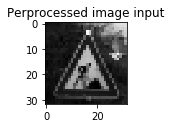

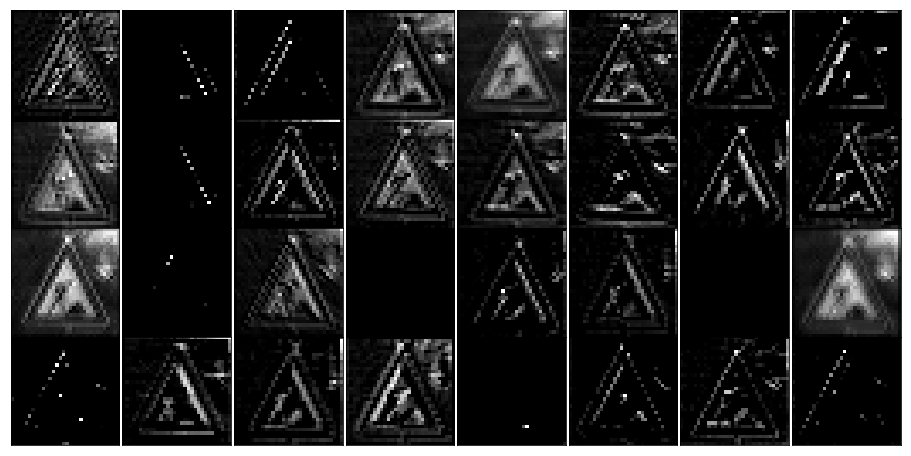

In [113]:
display_featuremap(X_test_gray[77], model_path, show_layer1=True)

INFO:tensorflow:Restoring parameters from checkpoint/cnn_small_kernel_deep_wide_s4w75_lr_001_epoch_20_valacc_0.968254
INFO Restoring parameters from checkpoint/cnn_small_kernel_deep_wide_s4w75_lr_001_epoch_20_valacc_0.968254


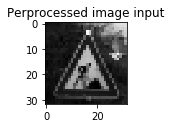

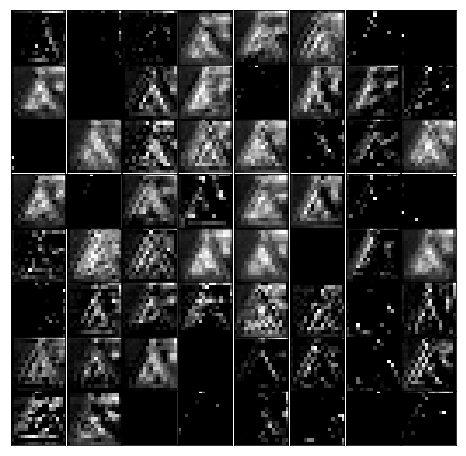

In [115]:
display_featuremap(X_test_gray[77], model_path, show_layer2=True)

INFO:tensorflow:Restoring parameters from checkpoint/cnn_small_kernel_deep_wide_s4w75_lr_001_epoch_20_valacc_0.968254
INFO Restoring parameters from checkpoint/cnn_small_kernel_deep_wide_s4w75_lr_001_epoch_20_valacc_0.968254


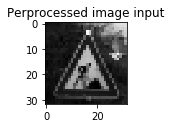

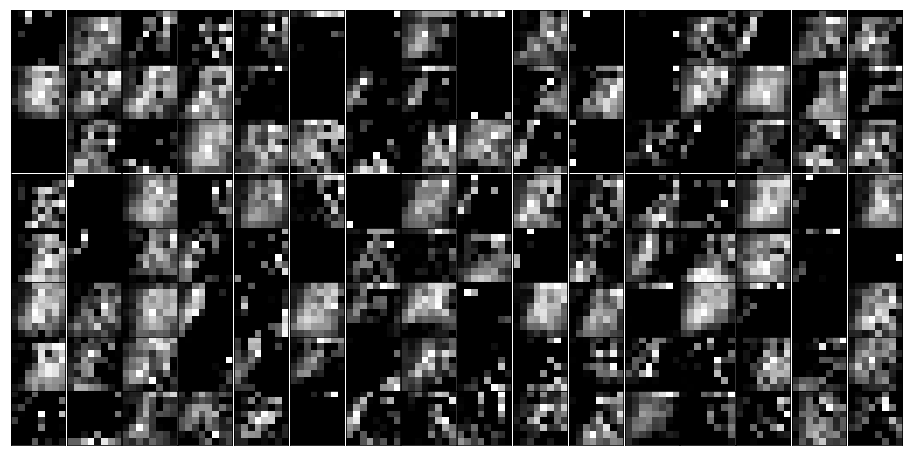

In [119]:
display_featuremap(X_test_gray[77], model_path, show_layer3=True)

INFO:tensorflow:Restoring parameters from checkpoint/cnn_small_kernel_deep_wide_s4w75_lr_001_epoch_20_valacc_0.968254
INFO Restoring parameters from checkpoint/cnn_small_kernel_deep_wide_s4w75_lr_001_epoch_20_valacc_0.968254


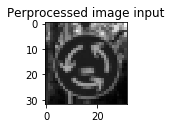

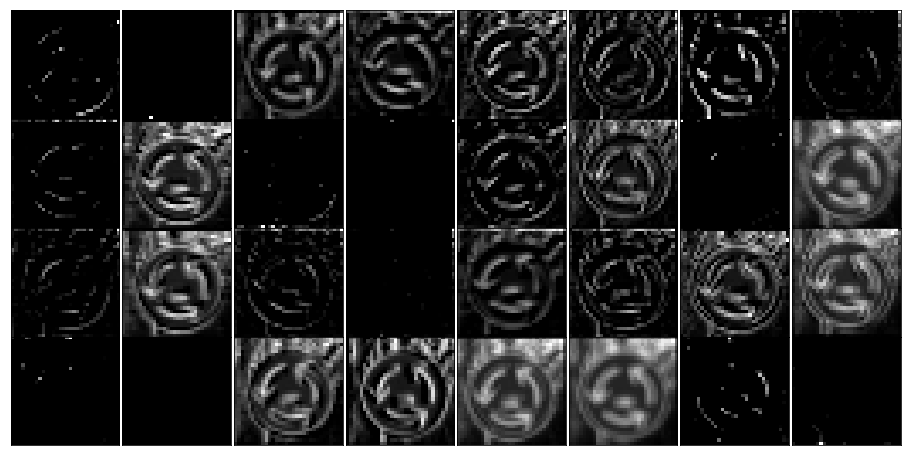

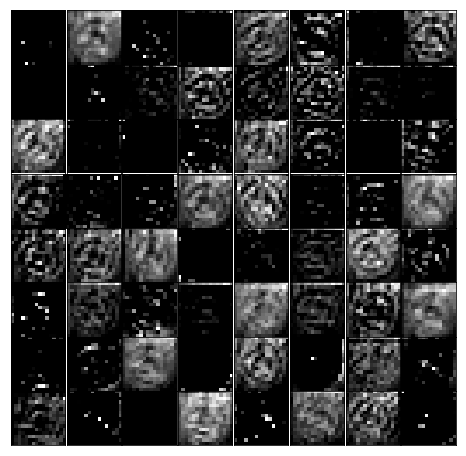

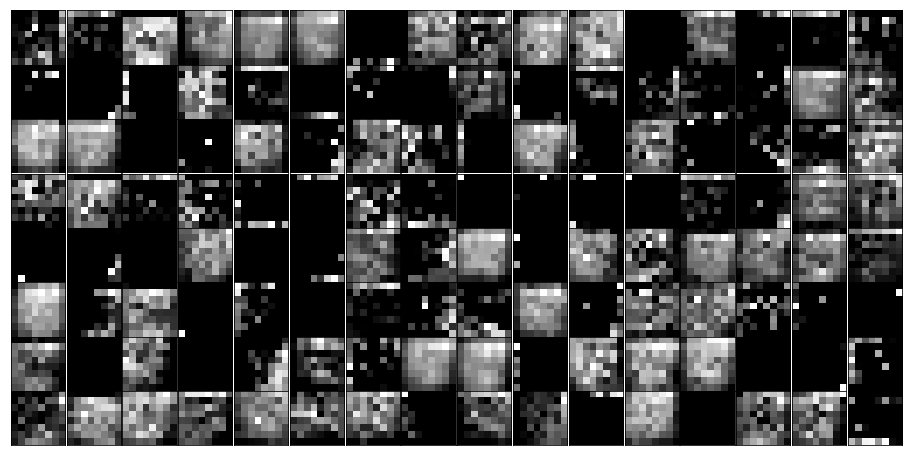

In [120]:
display_featuremap(X_test_gray[777], model_path, True, True, True)